$$ \LARGE
\underline {\textbf{Problema 2}}
$$

Se tiene una barra delgada de aluminio, originalmente a 0°C, cuyos extremos se someten
repentinamente a temperaturas fijas. El extremo izquierdo se mantiene a una temperatura constante de
100°C y el derecho a 50°C. Utilice los métodos explícito e implícito (Crank-Nicolson) de diferencias
finitas para calcular la evolución de la distribución de temperaturas en función del tiempo. Tome que
la barra tiene 10cm de longitud y k=0.835 cm2/s (aluminio). Haga los cálculos para Δx=2 cm y t =0.1seg. Repítalos para Δt=5 seg y compare sus resultados. Analice el comportamiento de la solución para los distintos regímenes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy  # este paquete sirve si vamos a inicializar un vector igual a otro

In [2]:
plt.rc('figure', figsize=(15, 10))
plt.rc('font', size=10)

In [3]:
N = 6
long = 10
k = 0.835  # cm^2/s
dx = long/(N-1)  # cm
T_izq = 100
T_der = 50

print('dx = ', dx)

dx =  2.0


In [33]:
def plot_temps(frac_tiempo, it, dt, TT):
    print(dt,it)
    pos_temps = []  # almacena los indices de las posiciones de los vectores columna a cada tiempo
    lab = []  # almacena los labels de cada curva
    for n in frac_tiempo:
        if n == 0:
            pos_temps.append(0)  # posición de la columna a una fracción del tiempo total
            lab.append('0 segundos')
        else:
            pos_temps.append(round((n)*np.shape(TT)[1])-1)  # posición de la columna a una fracción del tiempo total
#            lab.append(str(round(n*it*dt, 2))+' segundos')
            lab.append(f'{n*it*dt:.2f} segundos')
    for i, temps in enumerate(pos_temps):
        plt.plot(x, TT[:, temps], label=lab[i])

    plt.legend()
    plt.grid('on')
    plt.xlabel('t [s]')
    plt.ylabel('T [°C]')
    plt.title('Curvas de temperatura a determinado tiempo')
    plt.plot()

$$
$$

$ \large
\underline
{\textbf{Temperatura en cada posición de la barra en equilibrio}}
$

$ \Large
T = -mx + b
$

In [5]:
T = np.zeros([N, 1])
T[0] = T_izq
T[-1] = T_der
x = np.linspace(0, long, N)

$ \Large
T(0)=100
$
$$
$$
$ \Large
T(10) = 50
$

$ \Large
T = -5Ndx + 100
$

In [6]:
b = T[0]
m = (T[-1]-T[0])/long
Tm = m*round(N/2)*dx+b  # Tm es la temperatura respecto a la que calculo el error relativo
Tm = float(Tm)
pm = round(N/2)  # pos de la temperatura a comparar con Tm en el vector de temperaturas

$$
$$

$ \Large
\underline{\textbf{Método explícito}}
$
$$
$$
$ \Large
T_{i}^{l+1}=T_{i}^{l}+\lambda (T_{i+1}^{l}-2T_{i}^{l}+T_{i-1}^{l})
$

$ \Large
a)\ \Delta t=0.1s
$

In [37]:
dt = 0.01  # s
lam = k*dt/dx**2

<div style="background:#999900"> lo que pasa es que en el contador estas pisando k! </div> 

In [38]:
M = np.eye(N)

for i in range(1, N-1):
    M[i, i] = 1-2*lam
    M[i, i-1] = lam
    M[i, i+1] = lam

<div style="background:#999900">toda esta celda la podes reemplazar por una función, sin la parte del plot</div> 

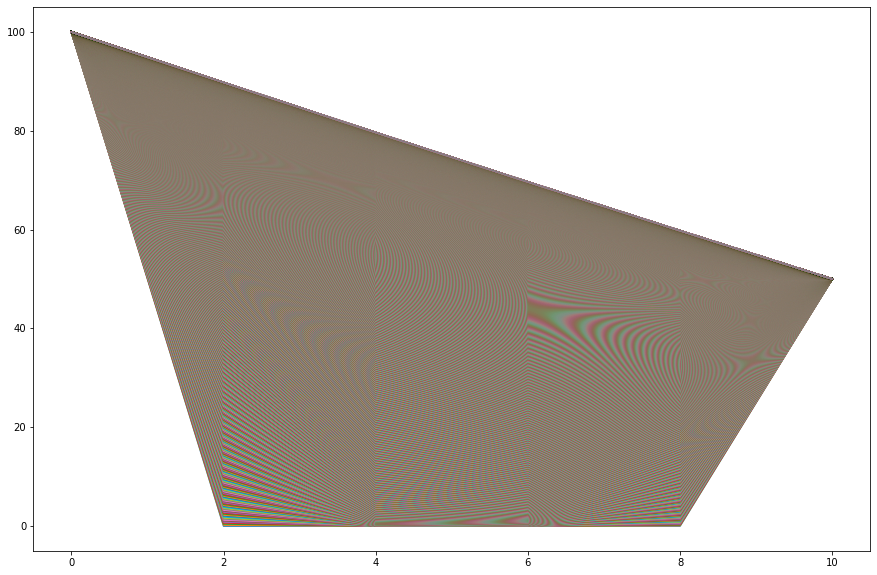

In [39]:
er = 1
it = 0
Ta = copy.copy(T)
Temps = copy.copy(Ta)
plt.plot(x, Temps)  # grafico la condicion inicial

while er > 0.005:  # corto el while cuando el error r entre la temperatura en el medio de la barra enquilibrio y la calculada sea 0.005
    Ta = M.dot(Ta)
    er = (abs(Ta[pm]-Tm))/Tm
    it += 1
    plt.plot(x, Ta)
    Temps = np.append(Temps, Ta, axis=1)

In [40]:
def time_evolv(Tinicial, Matriz,tol = 1e-5):
    er = [1] # de paso guardas tambien los errores
    it = 0
    Temps = copy.copy(Tinicial)

    while er[-1] > tol:  # corto el while cuando el error r entre la temperatura en el medio de la barra enquilibrio y la calculada sea 0.005
#        Ta = M.dot(Ta)
        Ta = Matriz.dot(Temps[:,-1]).reshape([-1,1])
        er.append((abs(Ta[pm]-Tm))/Tm)
#        it += 1  esta variable no la usas, pero la usarias para cortar por iteraciones.
# para eso podes usar Temps.shape[-1]
#        plt.plot(x, Ta)
        Temps = np.append(Temps, Ta, axis=1)
    return Temps, er

In [41]:
Temps,err = time_evolv(T, M)

In [42]:
frac_tiempo = np.array([0, 1/20, 1/10, 1/5, 1/3, 1])  # Fracciones del tiempo total para plotear

0.01 14719


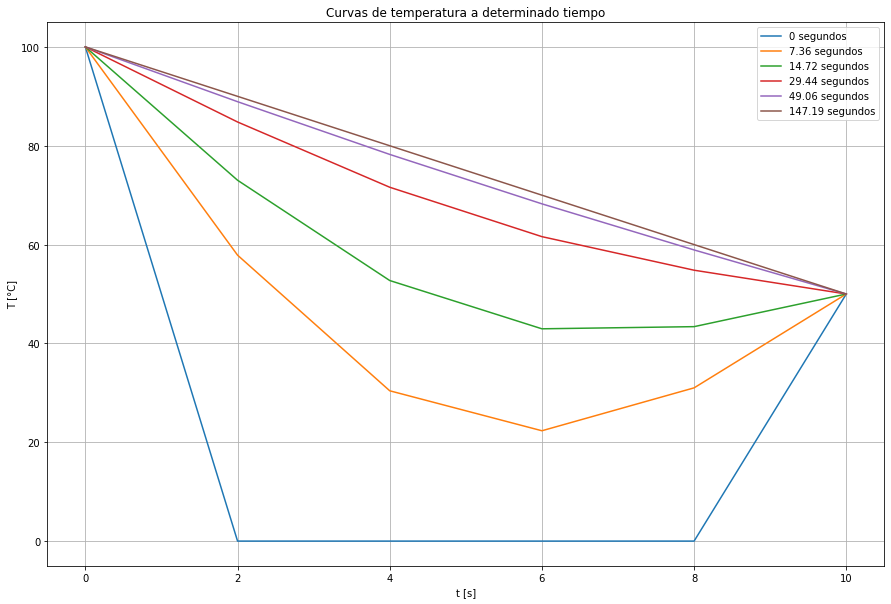

In [44]:
#plot_temps(frac_tiempo, it, dt, Temps)
plot_temps(frac_tiempo, Temps.shape[-1], dt, Temps)

$$
$$

$ \LARGE
\underline{\textbf{Crank-Nicolson}}
$
$$
$$
$ \Large
-\lambda T_{i-1}^{l+1}+2(1+\lambda)T_{i}^{l+1}-\lambda T_{i+1}^{l+1}=\lambda T_{i-1}^{l}+2(1-\lambda )T_{i}^{l}+\lambda T_{i+1}^{l}
$

$ \Large
A\ T^{l+1}=B\ T^{l}
$

$ \Large
T^{l+1}=A^{-1} B\ T^{l}
$

$ \Large
b)\ \Delta t=5s
$

In [45]:
k

0.835

In [46]:
dtb = 5  # s
lamb = k*dtb/(dx**2)

In [47]:
A = np.eye(N)
B = np.eye(N)

<div style="background:#999900"> lo que pasa es que en el contador estabas pisando k! </div> 

In [48]:
for i in range(1, N-1):
    A[i, i] = 2*(1+lamb)
    A[i, i-1] = -lamb
    A[i, i+1] = -lamb

for i in range(1, N-1):
    B[i, i] = 2*(1-lamb)
    B[i, i-1] = lamb
    B[i, i+1] = lamb

Ainv = np.linalg.inv(A)
AinvB = Ainv.dot(B)

<div style="background:#999900">todo el while lo podes reemplazar por una función</div> 

In [49]:
#erb = 1
#itb = 0
#Tb = copy.copy(T)
#Tempsb = copy.copy(Tb)
#plt.plot(x, Tempsb)  # grafico la condicion inicial
#while erb > 0.005:  # corto el while cuando el error r entre la temperatura en el medio de la barra enquilibrio y la calculada sea 0.02
##    Tb = AinvB.dot(Tb)
#    Tb = AinvB.dot(Tempsb[:,-1])
#    erb = (abs(Tb[pm]-Tm))/Tm
#    itb += 1
#    plt.plot(x, Tb)
#    Tempsb = np.append(Tempsb, Tb.reshape([-1,1]), axis=1)

In [50]:
Tempsb, errb = time_evolv(T, AinvB)

5 31


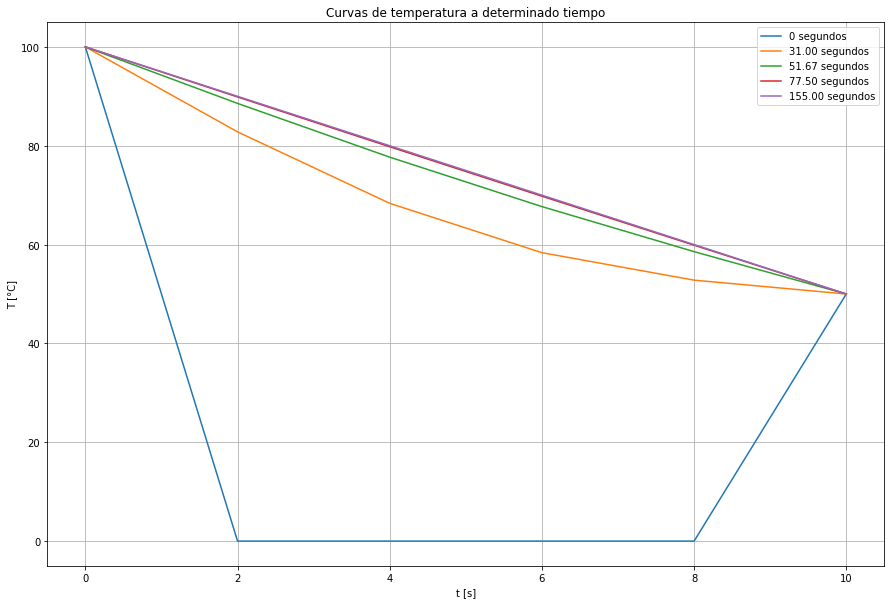

In [51]:
frac_tiempo = [0, 1/5, 1/3, 1/2, 1]  # Fracciones del tiempo total para plotear
plot_temps(frac_tiempo, Tempsb.shape[-1], dtb, Tempsb)

<div style="background:#999900">acordate también que podes definir los índices de tiempo para graficar en escala logarítmica</div> 


In [20]:
frac_tiempo = np.append([0],np.logspace(-1.5,0,5))

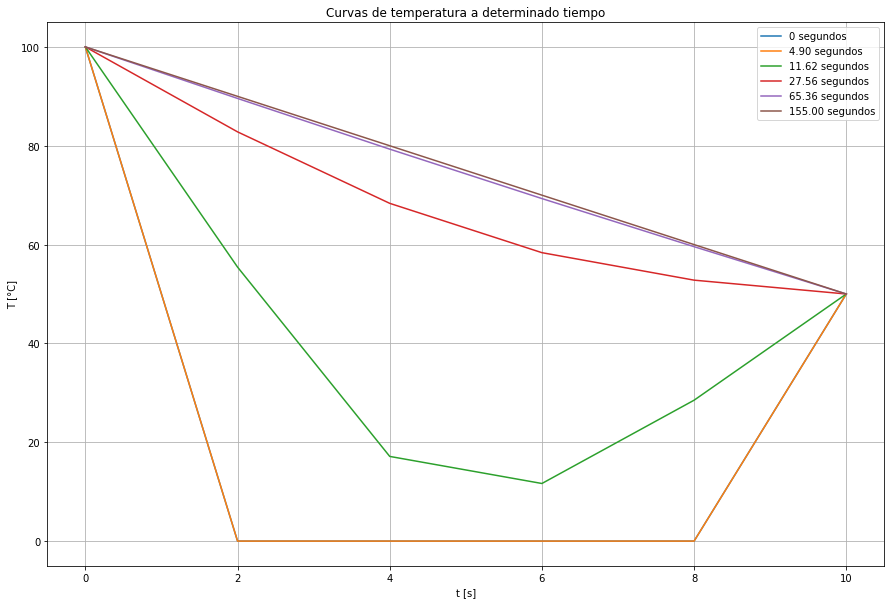

In [21]:
plot_temps(frac_tiempo, Tempsb.shape[-1], dtb, Tempsb)